In [6]:
import pandas as pd
import numpy as np
import joblib
import os
import shap
import matplotlib.pyplot as plt

In [2]:
# --- 1. MOUNTING & PATH CONFIGURATION ---
def log_audit(message):
    print(f"[AUDIT LOG] {message}")

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    BASE_PATH = '/content/drive/MyDrive/Capstone/'
    log_audit("Drive mounted successfully.")
except Exception as e:
    BASE_PATH = './'
    log_audit(f"Drive mount skipped. Using local path. Error: {e}")

MODEL_PATH = os.path.join(BASE_PATH, 'best_xgb_model.pkl')
DATA_PATH = os.path.join(BASE_PATH, 'selected_features.csv')
ENCODER_PATH = os.path.join(BASE_PATH, 'target_encoder.pkl')

Mounted at /content/drive
[AUDIT LOG] Drive mounted successfully.


In [4]:
# --- 2. DATA & MODEL LOADING ---
log_audit("Loading model, encoder, and data for audit...")
model = joblib.load(MODEL_PATH)
target_le = joblib.load(ENCODER_PATH)
df = pd.read_csv(DATA_PATH)

# Prepare features
X_processed = pd.get_dummies(df.drop('Approved_Flag', axis=1), drop_first=True)

[AUDIT LOG] Loading model, encoder, and data for audit...


In [5]:
# --- 3. SHAP EXPLAINABILITY ---
log_audit("Initializing SHAP Explainer (TreeExplainer)...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_processed)

[AUDIT LOG] Initializing SHAP Explainer (TreeExplainer)...


[AUDIT LOG] Generating Global SHAP Summary...


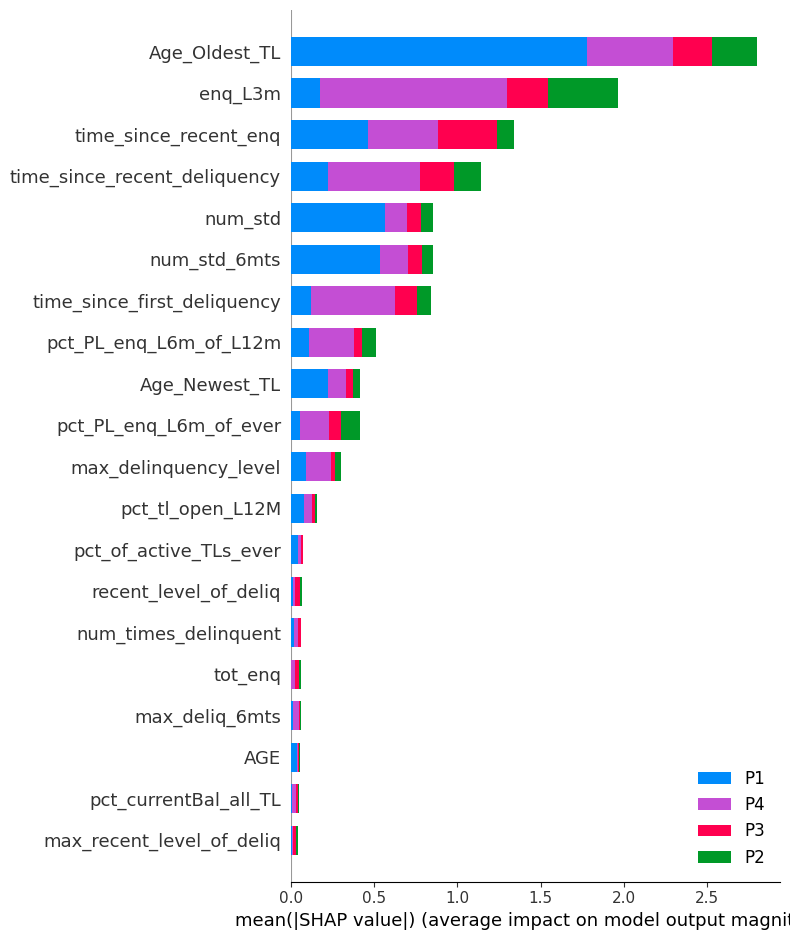

In [7]:
# A. Global Importance (Beeswarm/Summary Plot)
# Note: For multi-class, SHAP provides values for each class [0, 1, 2, 3]
log_audit("Generating Global SHAP Summary...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_processed, plot_type="bar", class_names=target_le.classes_)
plt.show()

[AUDIT LOG] Auditing a specific High-Risk (P4) prediction...


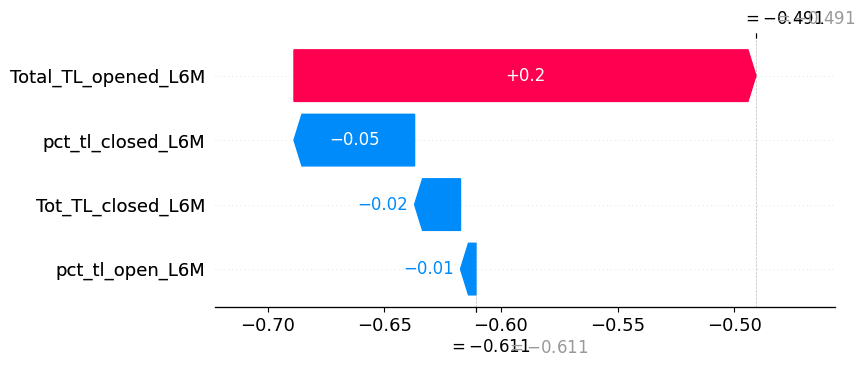

In [8]:
# B. Local Audit (Waterfall Plot for a High-Risk Prediction)
log_audit("Auditing a specific High-Risk (P4) prediction...")
# Find a row where the model predicted P4 (index 3)
p4_idx = np.where(model.predict(X_processed) == 3)[0][0]
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[3], shap_values[3][p4_idx],
                                        feature_names=X_processed.columns)
plt.show()